# Challenge Code

### Basic data extraction

In [1]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import lime
import lime.lime_tabular

import copy
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
#df = pd.read_csv("xML Challenge Dataset and Data Dictionary/heloc_dataset_v1.csv")
#df = pd.read_csv("new_data_set.csv")
#df = pd.read_csv("Processed Data/data_weighted5.csv")
df = pd.read_csv("data_weighted5.csv")
feature_names = list(df)
data = df.values
data = np.delete(data, 0, 1) # Deleting dataframe extra column

y = data[:,:1]
X = data[:,1:]

### Data Manipulation and Processing

In [3]:
#X_scaled = X
#X_scaled1 = (X-X.mean())/(X.std())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
num_samples , num_attributes = X_scaled.shape

#print("num_samples = " + str(num_samples) + ' , ' + "num_attributes = " + str(num_attributes))

In [4]:
X_tr = X_scaled[:int(0.5*num_samples)]
X_val = X_scaled[int(0.5*num_samples):int(0.75*num_samples)]
X_test = X_scaled[int(0.75*num_samples):]

y_tr = y[:int(0.5*num_samples)]
y_val = y[int(0.5*num_samples):int(0.75*num_samples)]
y_test = y[int(0.75*num_samples):]

print("Training samples: ", X_tr.shape[0])
print("Validation samples: ", X_val.shape[0])
print("Test samples: ", X_test.shape[0])

Training samples:  4935
Validation samples:  2468
Test samples:  2468


### Logistic Regression

In [5]:
logreg = linear_model.LogisticRegression(penalty="l2",C=0.001, solver="liblinear")
# Fit the model on the training set.
logreg.fit(X_tr, y_tr.reshape(y_tr.shape[0],))

pred = logreg.predict(X_val)
acc = np.mean(pred.reshape(pred.shape[0],1) == y_val)
coefs = logreg.coef_
print("Accuracy:", acc*100, "%")




Accuracy: 52.4311183144 %


### Support Vector Machines - Linear Kernel

In [43]:
from sklearn import svm

In [44]:
def acc_test_SVM(C_val):
    print("Running ", C_val)
    svc = svm.SVC(kernel='linear',C=C_val)
    svc.fit(X_tr,y_tr.reshape(y_tr.shape[0],))
    y_pred = svc.predict(X_val)
    acc = np.mean(y_pred.reshape(y_pred.shape[0],1) == y_val)
    return acc

In [45]:
C_acc = []
C_options = [0.00001,0.0001,0.001,0.01,0.1,1,10]

for test in C_options:
    C_acc.append(acc_test_SVM(test))

Running  1e-05
Running  0.0001
Running  0.001
Running  0.01
Running  0.1
Running  1
Running  10


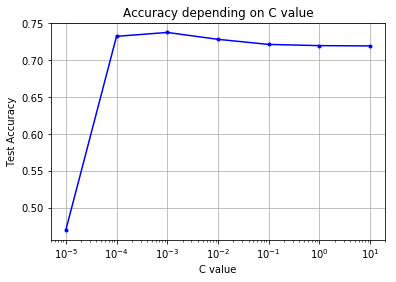

In [46]:
plt.semilogx(C_options,C_acc,'.-',color='blue')
plt.title("Accuracy depending on C value")
plt.xlabel('C value')
plt.ylabel('Test Accuracy')
plt.grid()

In [36]:
svm_lin = svm.SVC(kernel='linear',C=0.0001)
svm_rbf = svm.SVC(kernel='rbf',C=0.0001)
svm_pol = svm.SVC(kernel='poly',C=0.0001,degree=2)

svm_lin.fit(X_tr,y_tr.reshape(y_tr.shape[0],))
svm_rbf.fit(X_tr,y_tr.reshape(y_tr.shape[0],))
svm_pol.fit(X_tr,y_tr.reshape(y_tr.shape[0],))

y_lin = svm_lin.predict(X_val)
y_rbf = svm_rbf.predict(X_val) 
y_pol = svm_pol.predict(X_val) 

In [37]:
acc_lin = np.mean(y_lin.reshape(y_lin.shape[0],1) == y_val)
acc_rbf = np.mean(y_rbf.reshape(y_rbf.shape[0],1) == y_val)
acc_pol = np.mean(y_pol.reshape(y_pol.shape[0],1) == y_val)
print("Linear Kernel Accuracy:", acc_lin*100, "%")
print("RBF Kernel Accuracy:", acc_rbf*100, "%")
print("Polynomial Kernel Accuracy:", acc_pol*100, "%")

Linear Kernel Accuracy: 53.1604538088 %
RBF Kernel Accuracy: 53.1604538088 %
Polynomial Kernel Accuracy: 53.1604538088 %
